In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.svm import SVC
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request as request
import io
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline


# Suport Vector Machines

Um classificador binário por vetores de suporte (*Support Vector Machine* - SVC) procura dividir o espaço das variáveis explicativas - ou um mapa alternativo deste espaço - em duas regiões separadas por um hiperplano (um plano em múltiplas dimensões).

Suponha que se tenha um conjunto amostral de $n$ variáveis explicativas $\mathbf{x}_i$ cada uma com $m$ componentes e resultados binários $y_i$ (neste caso usam-se os valores -1 e 1).

O hiperplano para um classificador por vetores de suporte linear é dado por $\mathbf{w}^T \mathbf{x} - b$.
Este plano pode ser encontrado resolvendo-se o seguinte problema de minimização:

\begin{equation}
\underset{\mathbf{w}, b}{\mbox{min}} \frac{\mathbf{w}^T \mathbf{w}}{2} + c \frac{1}{n}\sum_i \left<1-y_i\left( \mathbf{w}^T \mathbf{x} -b \right) \right>
\end{equation}

onde $\left<x\right> = \mbox{max}(0,x)$ e $c$ é um *peso de penalização* atribuído a pontos do espaço em posições "trocadas", ou seja, pontos da amostra com valor -1 que se situam na região 1 e vice-versa.

Este problema de otimização é resolvido no espaço dual dos multiplicadores das restrições (neste caso, dos termos de penalização).

Equivale a resolver:

\begin{equation}
\underset{\lambda_i}{\mbox{max}} \sum_i \lambda_i - \frac{1}{2}\sum_i \sum_j \lambda_i \lambda_j y_i y_j \left(\mathbf{x}_i ^T \mathbf{x}_j\right)
\end{equation}

sujeito a $0 \leq \lambda_i \leq 1/cn$.

Este é um problema que pode ser resolvido de forma eficiente por programação quadrática.

O vetor $\mathbf{w}$ é dado por $\sum_i \lambda_i y_i \mathbf{x}_i$.

Os pontos $\mathbf{x}_i$ da amostra com índice $i$ para os quais $\lambda_i>0$ definem o plano de corte e são chamados de *vetores de suporte*.

## Kernel não linear:

Nota-se que a única informação necessária das coordenadas $\mathbf{x}_i$ para resolver o problema dual é o *produto interno*.

Suponha que exista um mapa $\phi$ que transforma os vetores $\mathbf{x}_i$ em $\phi(\mathbf{x}_i)$ de forma a melhorar a separação entre pontos com classificações distintas.

Ora, neste caso, o problema de otimização consiste em:

\begin{equation}
\underset{\lambda_i}{\mbox{max}} \sum_i \lambda_i - \frac{1}{2}\sum_i \sum_j \lambda_i \lambda_j y_i y_j \left(\phi(\mathbf{x}_i) ^T \phi(\mathbf{x}_j)\right)
\end{equation}

Seja um *Kernel* associado à transformação $\phi$ uma função real de dois vetores $x_i, x_j$ definida como:
\begin{equation}
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i) ^T \phi(\mathbf{x}_j)
\end{equation}

Então o Kernel é *suficiente* para resolver o problema de otimização.

Mais do que isso: No caso em que as variáveis são completamente separáveis, a solução do problema de otimização produz a mesma classificação para toda transformação linear das variáveis.
Assim é possível escolher transformações lineares do mapa $\phi$ de modo a obter um kernel bastante simples.

Por exemplo, pode-se mostrar que o Kernel $K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i ^T \mathbf{x}_j+k)^d$ corresponde a uma transformação polinomial das componentes de grau $d$ (o parâmetro $k$ define o peso relativo entre os componentes de menor e maior grau).

O Kernel de *Base Radial* é definido como:

\begin{equation}
K(\mathbf{x}_i, \mathbf{x}_j) = e^{-\frac{\left\| \mathbf{x}_i - \mathbf{x}_j \right\|^2}{2\sigma}}
\end{equation}

Mostra-se que esse Kernel corresponde a um mapa que leva as componentes do vetor $\mathbf{x}$ a um espaço de dimensão *infinita*.





# Exercício 1: SVM linear com valores sintéticos
(vide o exercício 1 da lista de regressão logística)

Uma variável binária valendo -1 ou 1 é sorteada sobre os pontos no plano $x,y$ com probabilidade dada por:

\begin{equation}
p(z=1:x,y) = \frac{1}{1+e^{-4(x+0.5y-6)}}
\end{equation}

A variável ```z``` definida abaixo contém uma amostra de 2000 pontos desta variável no retângulo em $x \in [0,10], \, y \in [0,10]$.
Os 2000 pontos estão organizados em duas "nuvens" como mostra a figura:


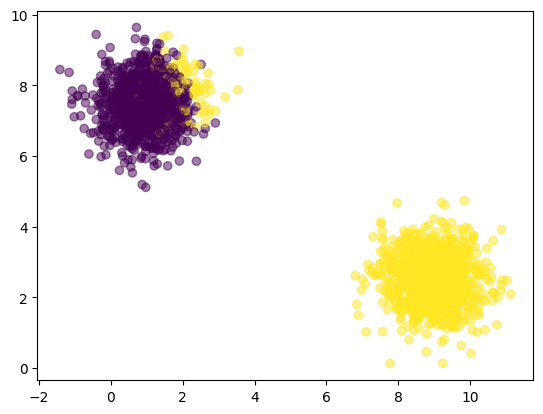

In [3]:
x = np.concatenate((np.random.normal(1, 0.7, size=1000),np.random.normal(9, 0.7, size=1000)))
y = np.concatenate((np.random.normal(7.5, 0.7, size=1000),np.random.normal(2.5, 0.7, size=1000)))
linear = x+0.5*y-6
p = 1/(1+np.exp(-4*linear))
z = 2*np.random.binomial(n=1, p=p)-1
plt.scatter(x,y,c=z, alpha=0.5)


## a) Construção de um classificador SVM linear



A função ```SVC(C=c, kernel='linear').fit(independentes, res)``` cria um classificador SVM linear entre as variáveis independentes em ```independentes``` com o vetor de resultados em ```res```. O peso da penalização de classificações errôneas é dado por ```c```.

A função retorna um objeto do tipo ```SVC```
 O vetor com os pesos de cada variável no vetor $w$ está no atributo ```coef_``` e o termo de interceptação 'b'  está no atributo ```intercept_```.

Use um peso ```c``` igual a 0.01% para aproximar as variáveis ```x``` e ```y``` acima.
 Compare o plano com o plano $x+0,5y-6=0$. (note que a equação do plano é indefinida a menos de uma constante.

In [4]:
# Complete com seu código
model = SVC(kernel = 'linear', C=0.01)
model.fit(np.column_stack((x,y)),z)


SVC(C=0.01, kernel='linear')

## b) Visualizando os parâmetros do classificador.

O preditor permite recuperar os valores dos vetores de suporte.
A função ```plot_svc(modelo, independentes, dependentes)``` definida abaixo mostra os vetores de suporte, sobrepostos às regiões de classificação e aos pontos originais de treinamento.

In [6]:
# Reproduzido do material de  R. Jordan Crouser do Smith College (2016)
def plot_svc(svc, X, y, h=0.05, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Mostra os vetores de suporte com um 'x'
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Quantidade total de vetores de suporte: ', svc.support_.size)


Execute esta função para o modelo criado no item a).

In [7]:
# Complete com seu código
plot_svc(model,x,y)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## C) Modificando a penalização.

Repita a criação do classificador do item a).
Agora você deve usar 1000 como valor de penalização.

Compare agora o plano obtido com o plano $x+0.5y-6=0$.

Repita a plotagem do item b) com este novo classificador.

In [ ]:
# Complete com seu código


# Exercício 2: Classificador polinomial:

Os pontos no retângulo $[-2,2]\times[-2,2]$ são classificados como pertencentes ou não ao círculo unitário centrado em (0,0).

In [ ]:
x = np.random.uniform(-2,2,1000)
y = np.random.uniform(-2,2,1000)
z = np.array([1 if xx*xx+yy*yy>1 else -1 for xx, yy in zip(x,y)])
plt.scatter(x,y,c=z, alpha=0.5)


É inútil tentar dividir este espaço em duas regiões com um plano.
A transformação $x \rightarrow x^2$ e $y \rightarrow y^2$ no entanto cria um espaço de coordenadas no qual esta separação é trivial:

In [ ]:
xt = x**2
yt = y**2
plt.scatter(xt,yt,c=z, alpha=0.5)


Um classificador SVM linear consegue separar exatamente estas regiões:


In [ ]:
modelo_transformado=SVC(kernel='linear', C=1000).fit(np.array([xt,yt]).T, z)
plot_svc(modelo_transformado, np.array([xt,yt]).T, z )


In [ ]:
confusion_matrix(z, modelo_transformado.predict(np.array([xt,yt]).T))


Isso pode ser feito *sem* a transformação explícita com um Kernel polinomial de *grau adequado*.

## a) Construindo um classificador polinomial.

O parâmetro ```kernel='poly'``` gera um classificador polinomial.
É possível especificaro o grau do classificador pelo parâmetro ```degree```.

Construa um classificador polinomial de segundo grau para estes dados.
Use o valor 10000 como penalização.

Obtenha a matriz de confusão do novo classificador e compare-a com a do classificador obtido por transformação explícita.

In [ ]:
# Complete com seu código


## b) Mostre os parâmetros do classificador com a função ```plot_svc```.

In [ ]:
# Complete com seu código


# Exercício 3: Classificador por base Radial

A figura abaixo mostra uma região do plano $x,y$ divida entre pontos *acima* de $y=\sin x$ e pontos abaixo.

In [ ]:
x = np.random.uniform(-4*np.pi, 4*np.pi, size=2000)
y = np.random.uniform(-2, 2, size=2000)
z = [1 if yy>np.sin(xx) else -1 for xx, yy in zip(x, y)]
plt.scatter(x,y,c=z, alpha=0.5)


O parâmetro  ```kernel='rbf'``` constrói um classificador usando a função de base radial.

Esta função equivale a projetar os pontos em um espaço de dimensões infinitas.

Construa e mostre através da função ```plot_svc``` classificadores com penalizações crescentes, a saber, 10, 100, 1000, 10000, 100000.

In [ ]:
# Complete com seu código


# Exercício 4: Avaliando pesos de penalização por validação cruzada

Naturalmente, o efeito dos pesos de classificadores não pode ser avaliado com os dados de treinamento.

Por outro lado, não podemos usar os dados de validação para avaliar parâmetros do classificador (pois isso é uma forma de treinamento).

Seria desejável obter uma métrica de desempenho de *hiperparâmetros* (os parâmetros que controlam o classificador, como o peso no SVM) sem consumir os dados de validação.
Por outro lado, toda métrica útil de hiperparâmetros deve ser obtida a partir de uma avaliação com dados *distintos* dos usados para treinamento.

A solução para esse dilema é usar a *validação cruzada*.
A validação cruzada clássica divide os dados de treinamento em $n$ partes.
Em seguida, reserva uma destas partes e aplica o processo de treinamento nas $n-1$ restantes.
Obtém-se em seguida métricas de desempenho validando-se o modelo com a parte reservada.
Este processo é repetido $n$ vezes, a cada vez selecionando-se uma parte diferente para avaliação.
A métrica final de avaliação do hiperparâmetro é obtida combinando-se todos os $n$ resultados de avaliação.

Assim é possível avaliar diferentes valores de hiperparâmetros usando-se validação cruzada *sem* consumir os dados reservados para validação.
Nota-se que o processo é computacionalmente intensivo!
Se cada avaliação usa $n$ partes e são avalidados $m$ parâmetros, os processos de treinamento são executados $mn$ vezes!.


Vamos construir um classificador por SVM usando dados do _Telco Churn_, empregados na 2a lista de exercícios:

In [ ]:
churn_df = pd.read_csv(io.TextIOWrapper(request.urlopen("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")))
churn_df.head()


O código a seguir normaliza os dados e divide-os em dois grupos, um de validação e um de treinamento.

In [ ]:
from sklearn import preprocessing
valores_explicativos = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
churn_int = np.asarray(churn_df['churn'], dtype=int)*2-1
normalizados = preprocessing.StandardScaler().fit(valores_explicativos).transform(valores_explicativos)
from sklearn.model_selection import train_test_split
x_treinamento, x_validacao, y_treinamento, y_validacao = train_test_split(normalizados, churn_int, test_size=0.25)


O objeto ```GridSearchCV``` da biblioteca sklearn permite ajustar parâmetros de classificadores através de uma validação cruzada.

Seu construtor é:

```GridSearchCV(classificador, parametros, scoring=pontuacao)```

onde ```classificador``` é um classificador a ser sintonizado, ```parametros``` é um dicionário com nomes dos parâmetros a serem avaliados associados a uma lista de valores a serem testados e ```pontuacao``` é uma string com o nome da métrica de pontuação a ser usada.

O método ```fit(x,y)``` neste caso, simultaneamente ajusta o classificador e treina-o com os dados de treinamento.

Ajuste e treine um classificador SVM de base radial com os dados ```x_treinamento``` e ```y_treinamento```.
Você deve escolher entre os valores $0.1$, $1$ e $10$ para o parâmetro ```C```.

Use ```'accuracy'``` como métrica de pontuação.
Mostre a matriz de confusão do seu classificador gerada a partir dos dados de validação.

In [ ]:
# Complete com seu código


# Exercício 5 - Previsão de Fraude em cartões de crédito.

O problema da previsão de fraudes é um problema notoriamente difícil em aprendizado de máquina.

A base de dados ```creditcard.zip``` é resultado de uma compilação de bancos do sistema financeiro Sueco ao longo da década de 2000-2010.

Os dados nela estão pré-processados por meio de uma técnica chamada *Principal Components Analysis*.
Entre outras propriedades, esta técnica *anonimiza* os dados, o que permitiu aos bancos doar a informação para estudo de aprendizado de máquina.

O código abaixo recupera a base de um servidor da internet e coloca-a em um dataframe chamado ```creditcard```.

In [ ]:
!wget https://www.lsc.poli.usp.br/pece_ai/creditcard.zip -O creditcard.zip
!unzip -o creditcard.zip


In [ ]:
creditcard = pd.read_csv("creditcard.csv")
creditcard.head()


Os componentes resultantes da *Principal Component Analysis* estão nas colunas ```V1``` a ```V28```.
Estas serão as variáveis independentes, ou explicativas.

O resultado a ser previsto está na coluna ```Class```.

Percebe-se que a base sofre de um severo desbalanço de categorias.
Menos de 0,2% das entradas representa uma fraude, como visto na célula abaixo:

In [ ]:
creditcard['Class'].mean()



Você deve aqui fazer a construção de um classificador SVM para esta base.

Para tanto, divida os dados em um conjunto de treinamento e um de testes (este último com 20% dos dados originais).

Avalie por validação cruzada os valores $100$, $300$, e $900$ de penalização para um classificador SVM com kernel de função de base radial.
Considerando o significativo desbalanço de categoria, use o atributo ```class_weight='balanced'``` na construção do classificador.
Isso irá fazer com que as amostras marcadas como "Fraude" tenham o seu peso aumentado no treinamento para compensar o seu relativo pequeno número na base de dados.

O validador cruzado deve usar a métrica de *precisão* para selecionar o melhor hiperparâmetro. Faça-o adcionando ```scoring='precision'``` na construção do objeto ```GridSearchCV```.

*Sugestão*: O objeto ```GridSearchCV``` faz por padrão uma validação cruzada com $n=5$.
Isso significa que são realizados 15 processos de treinamento.
Em uma base de dados deste tamanho, é possível que cada treinamento dure até 1 minuto, ou seja, o tempo total de seleção do hiperparâmetro pode levar até 15 minutos! Adicione o parâmetro ```verbose=10``` na construção do objeto  ```GridSearchCV``` para acompanhar o seu progresso.

Mostre a matriz de confusão gerada a partir dos dados de validação.

In [ ]:
# Complete com seu código


# Exercício 6: Classificação Multinomial e o reconhecimento de caracteres manuscritos.

Reproduzido do material de  R. Jordan Crouser do Smith College (2016)

A classificação multinomial extende o classificador SVM para situações em que mais de uma categoria de objetos aparece.

Vamos usar um classificador destes para reconhecimento de caracteres manuscritos.
Os dados serão do [Optical Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits) que contém imagens de dígitos de 0 a 9 manuscritos por voluntários.

O código abaixo recupera os dados, já divididos em treinamento e validação

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra -O optdigits.tra
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes -O optdigits.tes


O código a seguir coloca os dados em dataframes.

In [ ]:
X_train = pd.read_csv('optdigits.tra', header=None)
y_train = X_train[64]
X_train = X_train.drop(X_train.columns[64], axis=1)

X_test = pd.read_csv('optdigits.tes', header=None)
y_test = X_test[64]
X_test = X_test.drop(X_test.columns[64], axis=1)


As imagens dos caracteres estão em bitmaps $8\times8$.

Aqui está um exemplo de um caractere nesta base:

In [ ]:
plt.imshow(X_train.values[3].reshape(8,8), cmap="gray")
plt.show()


Felizmente a base está rotulada!
Como se vê(?), este é um dígito 4.

In [ ]:
print(y_train[3])


Podemos construir um classificador SVM linear multimodal para esta base:

In [ ]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)
# Mostra a matriz de confusão dos dados de treinamento
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
print("Matriz de confusão com dados de treinamento")
print(cm_df)


In [ ]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
print("Matriz de confusão com dados de teste")
print(cm_df)


Observe que não há classificação errada dos dados de treinamento.
Isso é de se esperar, a altíssima dimensionalidade dos dados (64 componentes) permite isolar cada região do espaço com um plano

O classificador acima foi feito com C=1. Determine usando validação cruzada qual o melhor valor para o parâmetro C dentre $0,05$, $0,5$, $5$, $50$, $500$ e $5000$. Finalmente, mostre a matriz de confusão gerada com os dados de validação.

In [ ]:
# Complete com seu código
